# Sheet 2 - Practical Exercise

In these exercises we will work with data randomly generated by ourselves. Importing an external dataset will not be necessary.

In [1]:
#add code to import your preferred visualization package

import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
Use Numpy to create two sets of 1000 Datapoints. Both should be following a normal distribution, one around an expected value of 5 with a standard deviation of 1.5, the other around an expected value of 12 with a standard deviation of 3.  

Plot both sets in one histogram.

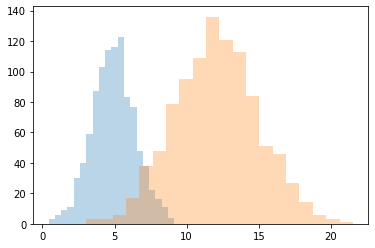

In [17]:
#Add code to create both datasets
rng = np.random.RandomState(0)
x1 = rng.randn(1000)*1.5 + 5
x2 = rng.randn(1000)*3 + 12

#Add code to plot both in a histogram
kwargs = dict(alpha=0.3, bins = 20)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs);

Create a third set of Datapoints containing the points of both of the previous sets. Plot this Dataset as a histogram as well.

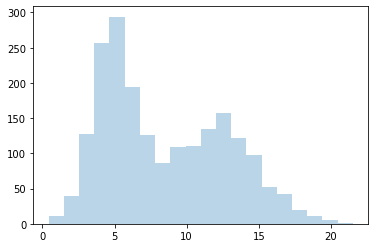

In [21]:
#Add code to combine the two existing datasets
x3 = np.concatenate((x1, x2))

#Add code to plot the result as a histogramm
plt.hist(x3, **kwargs);

You should see a histogram with two "humps". However the second hump should be significantly smaller than it was when plotting the datasets separately. Why is that the case?

## Exercise 2
Create a function that calculates the mean and standard deviation of datasets and uses those values to calculate the `SelfExp` for each value of the given dataset. Use this function to calculate the `SelfExp` for each value of each of the three datasets.  
Next create a scatterplot with the selfexp value as the y-axis, and the actual randomly generated value on the x-axis

In [23]:
def selfExp(values):
    #Add code for calculating mean and standard deviation
    mean = np.mean(values)
    sigma = np.std(values)
    #Add code for calculating the selfexp values
    f = lambda x: (abs(x - mean)) / sigma
    result = f(values)

    return result

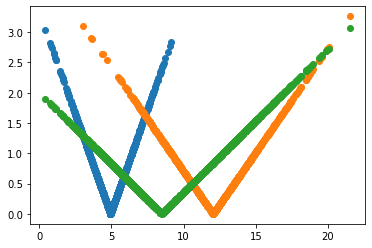

In [28]:
#Add code to create a scatterplot
x4 = selfExp(x1)
x5 = selfExp(x2)
x6 = selfExp(x3)

plt.scatter(x1, x4);
plt.scatter(x2, x5);
plt.scatter(x3, x6);

The resulting plot does not necessarily grant us new insight into the properties of our dataset. It should however give us a nice visualization and hopefully some understanding of what the selfexp actually is.

Now consider a threshold value $\tau = 2.5$, representing a probability of $99\%$ (compare slide 32 of the lecture).
For each of our three datasets, create a new dataset only containing the values with a SelfExp $s>\tau$.

In [30]:
#Add code to filter the datasets
def filterTau(values, selfExp, tau):
    result = values[selfExp > tau]
    return result

x7 = filterTau(x1, x4, 2.5)
x8 = filterTau(x2, x5, 2.5)
x9 = filterTau(x3, x6, 2.5)

print(x7)
print(x8)
print(x9)

[1.17051528 0.84111087 1.01124164 0.89048425 1.01657136 9.04433608
 1.161223   0.43078542 0.74816824 8.74580059 1.12580505 8.89163688
 9.13903267]
[21.51292432 19.57910472  3.66792256 19.92880716 19.35368916  3.5933916
  4.39633661  3.01616142 20.04171252  4.37628358 19.62069486 19.46532484
  4.68730692 19.86172154]
[21.51292432 19.57910472 19.92880716 19.35368916 20.04171252 19.62069486
 19.46532484 19.86172154]
